# Desarrollo de aplicaciones avanzadas de ciencias computacionales

#### TC3002B.201: IA
Ramona Najera, A01423596


<br>
<table>
  <tr>
    <th>Avance 1</th>
    <th>Avance 2</th>
    <th>Entrega final</th>
  </tr>
  <tr>
    <td>- Obtener, generar, aumentar dataset <br><br>
        - Separación training y test <br><br>
        - Técnicas de escalamiento <br><br>
        - Preprocesado de datos
    </td>
    <td>- Estado del arte <br><br>
        - Métricas <br><br>
        - Interpretación de resultados
    </td>
    <td>- Modelo mejorado <br><br>
        - Demo presencial <br><br>
        - Reporte
    </td>
  </tr>
</table>
<br>

In [55]:
# Conexión por google drive para obtener archivos de entrada
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# Magic functions (interactúa con el servidor)
%cd '/content/drive/MyDrive/Colab Notebooks/Recursos/A01423596/Satellite'
!ls

/content/drive/MyDrive/Colab Notebooks/Recursos/A01423596/Satellite
Index  sat.doc	sat.trn  sat.tst


# Statlog project

### Initial Dataset
🗃 [Landstat Satellite](https://archive.ics.uci.edu/dataset/146/statlog+landsat+satellite) (Climate & environment)

- 4435 training instances 🦾 <br>
- 2000 testing instances 📊 <br><br>

### Task: Classification
- 36 attributes (4 spectral bands x 9 pixels)
- Numerical attributes (between 0 and 255)
- 7 class labels (with no data for class 6)

In [57]:
class_names = ['red soil',                     # 1 → 0
               'cotton crop',                  # 2 → 1
               'grey soil',                    # 3 → 2
               'damp grey soil',               # 4 → 3
               'soil with vegetation stubble', # 5 → 4
               #'mixture class',               # 6 (NO DATA)
               'very damp grey soil']          # 7 → 5

In [58]:
print("🔍 DATASET PREVIEW\n  - 36 numbers for the pixels\n  - One for the class label\n")

with open("/content/drive/MyDrive/Colab Notebooks/Recursos/A01423596/Satellite/sat.trn", 'r') as train_file:
  info = train_file.readline().strip('\n').split(" ")

  print(len(info),"elems per line of info\n")

  print(info[:-1])
  print(info[-1])

🔍 DATASET PREVIEW
  - 36 numbers for the pixels
  - One for the class label

37 elems per line of info

['92', '115', '120', '94', '84', '102', '106', '79', '84', '102', '102', '83', '101', '126', '133', '103', '92', '112', '118', '85', '84', '103', '104', '81', '102', '126', '134', '104', '88', '121', '128', '100', '84', '107', '113', '87']
3


### Feature scaling and preprocessing
1. Separate class label from pixels info
2. Class numbers will go from 0 to 5 to match `class_names` index
3. Remove unused class
4. Pixels will go from 0 to 1

In [59]:
import numpy as np

def obtain_data(filename):
  img_arr = []
  label_arr = []

  with open(filename, 'r') as data_file:
    for line in data_file:
      info = line.split(" ")

      # Last number is class label
      label_arr.append(int(info[-1]) - 1)

      # Remove extra class
      if label_arr[-1] == 6:
        label_arr[-1] = 5

      # Construct image
      pixels = []
      for pixel in info[:-1]:
        pixels.append((int(pixel) / 255.0))

      # 4 arrays (one per spectral band)
      img_arr.append(np.array_split(np.array(pixels), 4))

  img_arr = np.array(img_arr)
  label_arr = np.array(label_arr).astype(np.uint8)

  print(img_arr[0],"\n")
  print(label_arr)

  return(img_arr, label_arr)

# >>> Obtain data
print("🦾 OBTAINING TRAIN INFO...\n")
train_images, train_labels = obtain_data("/content/drive/MyDrive/Colab Notebooks/Recursos/A01423596/Satellite/sat.trn")

print("\n📊 OBTAINING TEST INFO...\n")
test_images, test_labels = obtain_data("/content/drive/MyDrive/Colab Notebooks/Recursos/A01423596/Satellite/sat.tst")

# Separate live demo instances
demo_records = 10

# First n images
"""
demo_images = test_images[:demo_records]
demo_labels = test_labels[:demo_records]

test_images = test_images[demo_records:]
test_labels = test_labels[demo_records:]
"""

# Last n images
demo_images = test_images[(len(test_images) - demo_records):]
demo_labels = test_labels[(len(test_labels) - demo_records):]

test_images = test_images[:(len(test_images) - demo_records)]
test_labels = test_labels[:(len(test_labels) - demo_records)]

print(f'\n✅ {len(demo_images)} LIVE DEMO INSTANCES...\n    - {len(train_images)} train instances\n    - {len(test_images)} test instances remaining\n')
if len(demo_images):
  print(demo_images[0],"\n")
else:
  print([],"\n")
print(demo_labels)

🦾 OBTAINING TRAIN INFO...

[[0.36078431 0.45098039 0.47058824 0.36862745 0.32941176 0.4
  0.41568627 0.30980392 0.32941176]
 [0.4        0.4        0.3254902  0.39607843 0.49411765 0.52156863
  0.40392157 0.36078431 0.43921569]
 [0.4627451  0.33333333 0.32941176 0.40392157 0.40784314 0.31764706
  0.4        0.49411765 0.5254902 ]
 [0.40784314 0.34509804 0.4745098  0.50196078 0.39215686 0.32941176
  0.41960784 0.44313725 0.34117647]] 

[2 2 2 ... 3 3 3]

📊 OBTAINING TEST INFO...

[[0.31372549 0.4        0.4        0.30980392 0.29803922 0.4
  0.4        0.30980392 0.29803922]
 [0.4        0.41568627 0.3254902  0.29803922 0.38823529 0.42352941
  0.33333333 0.29803922 0.40392157]
 [0.4627451  0.34509804 0.31372549 0.41960784 0.4627451  0.34509804
  0.30980392 0.41960784 0.42745098]
 [0.34117647 0.30980392 0.41960784 0.42745098 0.34117647 0.30980392
  0.41960784 0.44313725 0.34117647]] 

[2 2 3 ... 4 4 4]

✅ 10 LIVE DEMO INSTANCES...
    - 4435 train instances
    - 1990 test instances rema

In [60]:
import tensorflow as tf

# Helper libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Simple model multilayer perceptron (neural network)
model  =  Sequential([ # Conectado en orden
                    Flatten(input_shape=train_images[0].shape), # Matrices se vuelven una sola línea
                    # Neuronas intermedias
                    Dense(128, activation='relu'),
                    Dense(67, activation='relu'),
                    Dense(len(class_names), activation='softmax') # Neuronas de salida (# de clases)
          ])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 67)             │         8,643 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 6)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,787 (53.86 KB)

 Trainable params: 13,787 (53.86 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Compile model with an optimiser, loss function and metric
model.compile(optimizer="adam", # Forma de gradiente descendiente
              loss="sparse_categorical_crossentropy", # Presentación del error
              metrics =['accuracy']) # Evaluación del comportamiento

# Entrena con datos, respuestas y épocas
history = model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3408 - loss: 1.6029
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6413 - loss: 1.0450
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8056 - loss: 0.6737
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8306 - loss: 0.5332
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8278 - loss: 0.5002
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8252 - loss: 0.4803
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8191 - loss: 0.4848
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8420 - loss: 0.4368
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8384 - loss: 0.4344
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8284 - loss: 0.4436
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8282 - loss: 0.4442
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [63]:
accuracy = 0.8632 # Actualizar aquí con el accuracy resultante

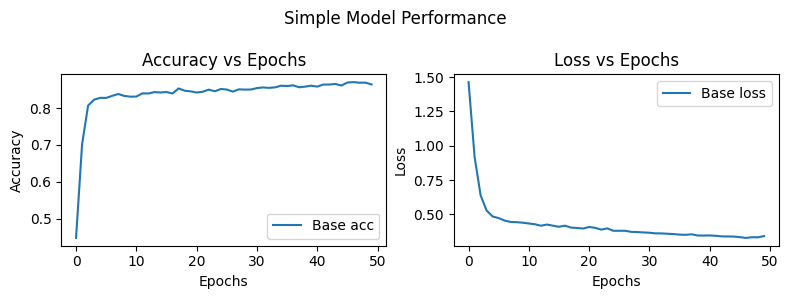

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load history into dataframe to analyze learning performance
df = pd.DataFrame(history.history)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
fig.suptitle('Simple Model Performance')

acc_vs_epochs = df.plot(y="accuracy", title="Accuracy vs Epochs", label="Base acc", legend=True, ax=ax1)
acc_vs_epochs.set(xlabel="Epochs", ylabel="Accuracy")

loss_vs_epochs = df.plot(y="loss", title = "Loss vs Epochs", label="Base loss", legend=True, ax=ax2)
loss_vs_epochs.set(xlabel="Epochs", ylabel="Loss")

plt.tight_layout()

In [65]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc) # Overfitting: gap between traing acc and test acc

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8470 - loss: 0.3672

Test accuracy: 0.852763831615448


In [66]:
def make_predictions(prob_model, images):
  predicted = prob_model.predict(images)
  predicted_lbls = np.argmax(predicted, axis=1)

  return(predicted, predicted_lbls)

# >>> Make predictions
probability_model = tf.keras.Sequential([model,
                                          tf.keras.layers.Softmax()]) # Model linear outputs are transformed into probabilities
predictions, predicted_labels = make_predictions(probability_model, test_images)
print("\n1st prediction\n", predictions[0])
print("\nHighest confidence value:", predicted_labels[0])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

1st prediction
 [0.14867042 0.13481404 0.29543722 0.14994718 0.13558197 0.13554929]

Highest confidence value: 2


In [67]:
from tabulate import tabulate

# Confusion matrix
count_predictions = []
headers = ['↓ True vs Predicted →', '0', '1', '2', '3', '4', '5', '↓ Total ↓']

for i in range(len(class_names)):
  count_predictions.append([0 for i in range(len(class_names) + 2)])
  count_predictions[i][0] = i

for i in range(len(test_labels)):
  count_predictions[test_labels[i]][predicted_labels[i] + 1] += 1
  count_predictions[test_labels[i]][7] += 1

print(tabulate(count_predictions, headers))

  ↓ True vs Predicted →    0    1    2    3    4    5    ↓ Total ↓
-----------------------  ---  ---  ---  ---  ---  ---  -----------
                      0  447    0    3    0    4    0          454
                      1    0  213    0    1   10    0          224
                      2    2    1  370   22    0    2          397
                      3    0    1   39   61    7  103          211
                      4    4   12    0    2  203   13          234
                      5    0    1   10   38   18  403          470


> Fin del 1er avance: 6 de abril del 2025

In [68]:
# Comprobación
from tensorflow.math import confusion_matrix

prediction_matrix = confusion_matrix(test_labels, predicted_labels).numpy()

print(tabulate(prediction_matrix, headers[1:]))

  0    1    2    3    4    5
---  ---  ---  ---  ---  ---
447    0    3    0    4    0
  0  213    0    1   10    0
  2    1  370   22    0    2
  0    1   39   61    7  103
  4   12    0    2  203   13
  0    1   10   38   18  403


### Base metrics

- **Accuracy** (overall correctness of a model) <br>
  `(TP + TN) / Todo`
- **Precision** (accuracy of positive predictions) <br>
  `TP / (TP + FP)`
- **Recall** (how well the model identifies positive instances) <br>
  `TP / (TP + FN)`
- **F1** (represents precision and recall in a single value) <br>
  `Precision * Recall / (Precision * Recall)`
- **MCC** (considers all elements of the confusion matrix) <br>
  `(TP * TN - FP * FN) / sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))`

In [69]:
print(f"TRAIN ACC vs TEST ACC\n{accuracy} ↔ {test_acc}")

TRAIN ACC vs TEST ACC
0.8632 ↔ 0.852763831615448


In [70]:
#pip install scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

metrics_headers = ['↓ Metric & Model →', 'Model 1', 'Model 2']
metrics_body = [['Train accuracy', 0, 0], ['Test accuracy', 0, 0], ['Precision', 0, 0], ['Recall', 0, 0], ['F1-score', 0, 0], ['Matthews Correlation Coeff', 0, 0]]

def set_metrics(title, idx, acc, predicted_lbls):
  metrics_headers[idx] = title
  metrics_body[0][idx] = acc

  # Misleading with imbalanced datasets
  metrics_body[1][idx] = accuracy_score(test_labels, predicted_lbls)

  # How good is the model avoiding false positives
  metrics_body[2][idx] = precision_score(test_labels, predicted_lbls, average='macro')

  # How good is the model avoiding false negatives
  metrics_body[3][idx] = recall_score(test_labels, predicted_lbls, average='macro')

  # Precision + Recall
  metrics_body[4][idx] = f1_score(test_labels, predicted_lbls, average='macro')

  # Helpful with imbalanced datasets
  metrics_body[5][idx] = matthews_corrcoef(test_labels, predicted_lbls)

  print(tabulate(metrics_body, metrics_headers))

# >>> Create metrics table
set_metrics('ANN - MLP', 1, accuracy, predicted_labels)

↓ Metric & Model →            ANN - MLP    Model 2
--------------------------  -----------  ---------
Train accuracy                 0.8632            0
Test accuracy                  0.852764          0
Precision                      0.817006          0
Recall                         0.813589          0
F1-score                       0.810354          0
Matthews Correlation Coeff     0.819666          0


### Observaciones importantes

#### Matriz de confusión
1. Las clases con más instancias (0 y 5) tienen más del doble de registros que las de menos (3 y 1)
2. La 3ra clase es la que menos intancias predecidas correctamente tiene
- Es confundida en su mayoría por las clases 2 y 5
- Es la clase con menos instancias

#### Metrics
1. Este primer modelo es overfitting porque el accuracy del entrenamiento tiende a ser menor que el de las pruebas
2. A pesar de que el MCC es un poco menor al accuracy, la cifra refleja que el desequilibrio de clases no está siendo un factor muy importante
3. Este primer modelo es un poco mejor evitando falsos positivos que falsos negativos (aunque su desempeño en ambas áreas es muy similar)



### Enhanced model
- 2 Conv2D layers for feature extraction

In [71]:
# Helper library
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D

# Enhancement: Feature extraction
enh_model = Sequential([
                    # e.g. 4 filtros de tamaño 1x3 -> Aprende 12 features
                    Conv2D(filters=4, kernel_size=(1,3), activation='relu', input_shape=(4,9,1)),
                    Conv2D(filters=2, kernel_size=(1,2)),
                    # Configuración base (modelo inicial)
                    Flatten(input_shape=(36,1)),
                    Dense(128, activation='relu'),
                    Dense(67, activation='relu'),
                    Dense(len(class_names), activation='softmax')
          ])

enh_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 4, 7, 4)        │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 6, 2)        │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 67)             │         8,643 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 6)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,357 (59.99 KB)

 Trainable params: 15,357 (59.99 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Compile model with same hyperparameters
enh_model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics =['accuracy'])

# Entrenamiento
enh_history = enh_model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3499 - loss: 1.5912
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7016 - loss: 0.8572
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7946 - loss: 0.6369
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8016 - loss: 0.5469
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8084 - loss: 0.5176
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8181 - loss: 0.4707
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8357 - loss: 0.4291
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8359 - loss: 0.4429
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8523 - loss: 0.4052
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8492 - loss: 0.3918
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8524 - loss: 0.4015
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [73]:
enh_accuracy = 0.8956 # Actualizar con el accuracy resultante

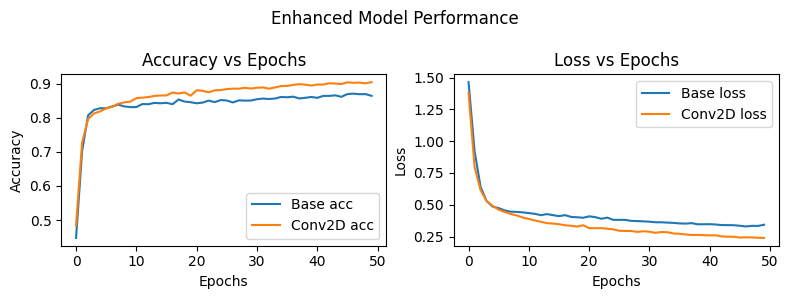

In [74]:
# Analyze learning performance
df2 = pd.DataFrame(enh_history.history)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
fig.suptitle('Enhanced Model Performance')

acc_vs_epochs = df.plot(y="accuracy", title="Accuracy vs Epochs", label="Base acc", legend=True, ax=ax1)
df2.plot(y="accuracy", title="Accuracy vs Epochs", label="Conv2D acc", legend=True, ax=ax1)
acc_vs_epochs.set(xlabel="Epochs", ylabel="Accuracy")

loss_vs_epochs = df.plot(y="loss", title = "Loss vs Epochs", label="Base loss", legend=True, ax=ax2)
df2.plot(y="loss", title = "Loss vs Epochs", label="Conv2D loss", legend=True, ax=ax2)
loss_vs_epochs.set(xlabel="Epochs", ylabel="Loss")

plt.tight_layout()

In [75]:
# Evaluate the model
enh_test_loss, enh_test_acc = enh_model.evaluate(test_images, test_labels)

print('\nTest accuracy:', enh_test_acc) # Overfitting: gap between traing acc and test acc

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9051 - loss: 0.2640

Test accuracy: 0.8999999761581421


In [76]:
# >>> Make predictions
enh_probability_model = tf.keras.Sequential([enh_model,
                                          tf.keras.layers.Softmax()]) # Model linear outputs are transformed into probabilities
enh_predictions, enh_predicted_labels = make_predictions(enh_probability_model, test_images)
print("\n1st prediction\n", enh_predictions[0])
print("\nHighest confidence value:", enh_predicted_labels[0])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

1st prediction
 [0.19011578 0.1377788  0.24241236 0.15318227 0.13781756 0.13869318]

Highest confidence value: 2


In [77]:
enh_prediction_matrix = confusion_matrix(test_labels, enh_predicted_labels).numpy()

print(tabulate(enh_prediction_matrix, headers[1:]))

  0    1    2    3    4    5
---  ---  ---  ---  ---  ---
451    0    0    0    3    0
  0  218    1    1    3    1
  5    0  379    9    1    3
  0    2   35  135    2   37
  3    4    0    4  207   16
  0    0   16   41   12  401


In [78]:
print(f"TRAIN ACC vs TEST ACC\n{enh_accuracy} ↔ {enh_test_acc}")

TRAIN ACC vs TEST ACC
0.8956 ↔ 0.8999999761581421


In [79]:
# >>> Update metrics table
set_metrics('Conv2D enh', 2, enh_accuracy, enh_predicted_labels)

↓ Metric & Model →            ANN - MLP    Conv2D enh
--------------------------  -----------  ------------
Train accuracy                 0.8632        0.8956
Test accuracy                  0.852764      0.9
Precision                      0.817006      0.888184
Recall                         0.813589      0.883147
F1-score                       0.810354      0.885045
Matthews Correlation Coeff     0.819666      0.877328


> Fin del 2do avance: 18 de abril del 2025

[[0.27843137 0.40392157 0.4627451  0.37647059 0.26666667 0.41960784
  0.47843137 0.37647059 0.26666667]
 [0.40392157 0.4627451  0.36078431 0.27843137 0.40392157 0.42745098
  0.36078431 0.27843137 0.38823529]
 [0.44313725 0.36078431 0.27843137 0.38823529 0.4627451  0.37647059
  0.2745098  0.42745098 0.45882353]
 [0.37647059 0.2745098  0.39215686 0.42352941 0.36078431 0.25882353
  0.39215686 0.43921569 0.36078431]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
✅PREDICTION EVALUATION 0
[0.34519917 0.13028647 0.13039438 0.130345   0.13348947 0.13028556]
[0.34870055 0.1299272  0.12999831 0.12997484 0.1314713  0.12992784]


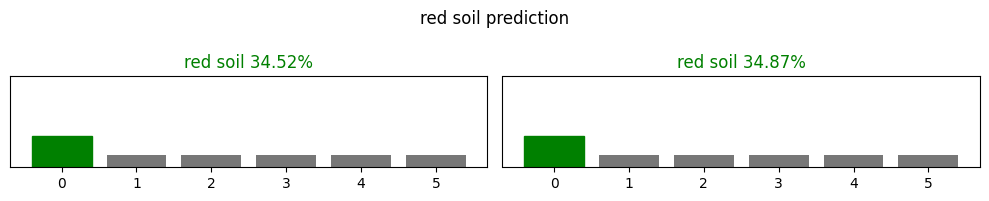

In [80]:
demo_idx = 0 # Base image for live demo
print(demo_images[demo_idx])

demo_img = np.array([[[0.3, 0.5, 0.5,  0.4, 0.3, 0.4, 0.5, 0.4, 0.3],
  [0.40392157, 0.4627451,  0.36078431, 0.27843137, 0.40392157, 0.42745098, 0.36078431, 0.27843137, 0.38823529],
  [0.44313725, 0.36078431, 0.27843137, 0.38823529, 0.4627451,  0.37647059, 0.2745098,  0.42745098, 0.45882353],
  [0.37647059, 0.2745098,  0.39215686, 0.42352941, 0.36078431, 0.25882353, 0.39215686, 0.43921569, 0.36078431]]])

demo_lbl = [demo_labels[demo_idx]]

def plot_demo_comparison(idx, predicted_one, predicted_lbls_one, predicted_two, predicted_lbls_two):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))
  fig.suptitle(f'{class_names[demo_lbl[idx]]} prediction')

  if predicted_lbls_one[idx] == demo_lbl[idx]:
    color = 'green'
  else:
    color = 'red'

  ax1.set_title(f'{class_names[predicted_lbls_one[idx]]} {(100.0*np.max(predicted_one[idx])):.2f}%', color=color)

  ax1.set_xticks(range(len(class_names)))
  ax1.set_yticks([])

  prediction_plt = ax1.bar(range(len(class_names)), predicted_one[idx], color="#777777")
  ax1.set_ylim([0, 1])

  prediction_plt[predicted_lbls_one[idx]].set_color('red')
  prediction_plt[demo_lbl[idx]].set_color('green')

  if predicted_lbls_two[idx] == demo_lbl[idx]:
    color = 'green'
  else:
    color = 'red'

  ax2.set_title(f'{class_names[predicted_lbls_two[idx]]} {(100.0*np.max(predicted_two[idx])):.2f}%', color=color)

  ax2.set_xticks(range(len(class_names)))
  ax2.set_yticks([])

  prediction_plt = ax2.bar(range(len(class_names)), predicted_two[idx], color="#777777")
  ax2.set_ylim([0, 1])

  prediction_plt[predicted_lbls_two[idx]].set_color('red')
  prediction_plt[demo_lbl[idx]].set_color('green')

  plt.tight_layout()
  plt.show()

demo_simple_predictions, demo_simple_predicted_labels = make_predictions(probability_model, demo_img)
demo_enh_predictions, demo_enh_predicted_labels = make_predictions(enh_probability_model, demo_img)

# >>> Live demo
for i in range(len(demo_img)):
  print(f'✅PREDICTION EVALUATION {i}', demo_simple_predictions[i], demo_enh_predictions[i], sep="\n")
  plot_demo_comparison(i, demo_simple_predictions, demo_simple_predicted_labels, demo_enh_predictions, demo_enh_predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
✅PREDICTION EVALUATION 0
[0.34668705 0.13013436 0.13020416 0.13017887 0.13266177 0.13013388]
[0.35050735 0.12973912 0.12976688 0.129789   0.13045816 0.12973954]


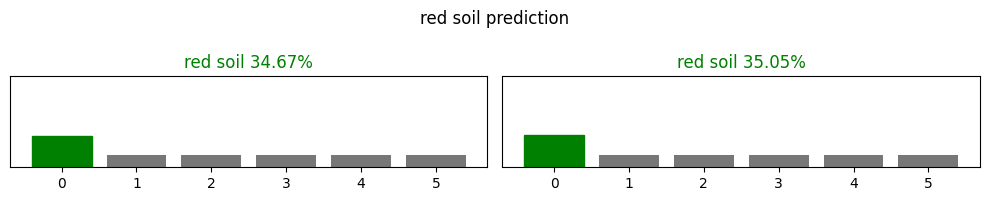

✅PREDICTION EVALUATION 1
[0.3470736  0.13009435 0.13012315 0.1301144  0.13250059 0.13009395]
[0.35017288 0.12977383 0.12978986 0.12979102 0.1306986  0.12977386]


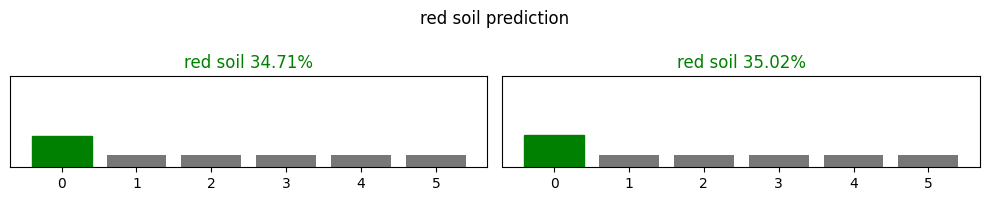

✅PREDICTION EVALUATION 2
[0.23631091 0.13830242 0.14855741 0.14205283 0.19678119 0.13799527]
[0.3110482  0.13349843 0.13477431 0.13445163 0.15273957 0.13348795]


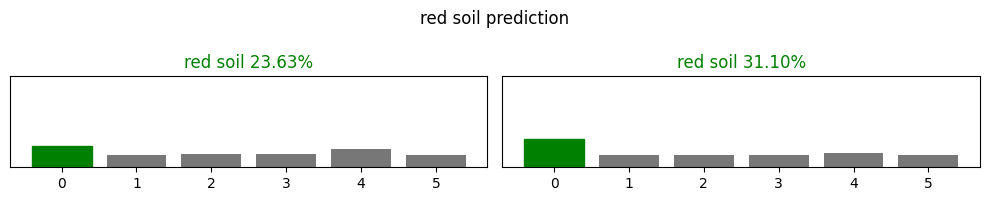

✅PREDICTION EVALUATION 3
[0.16419367 0.1416961  0.14285845 0.14329511 0.27116144 0.13679525]
[0.24814086 0.13765036 0.14401065 0.14180824 0.19077098 0.13761893]


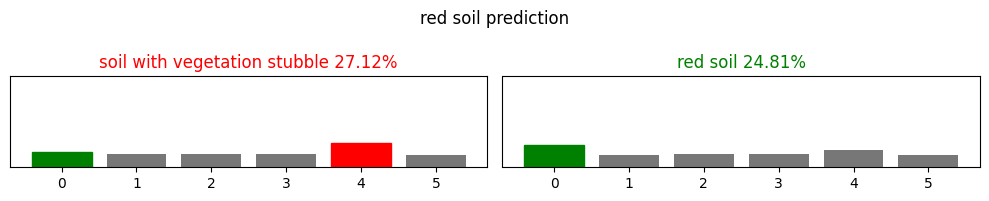

✅PREDICTION EVALUATION 4
[0.15416399 0.1377522  0.2599153  0.15343371 0.15690286 0.13783191]
[0.20958757 0.13866127 0.21493512 0.14425468 0.15243886 0.14012241]


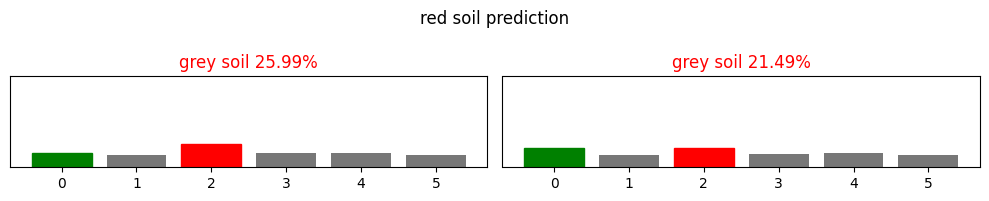

✅PREDICTION EVALUATION 5
[0.29257187 0.1350922  0.13488175 0.13563399 0.1670216  0.13479856]
[0.28261334 0.1353518  0.13533103 0.1355476  0.17581949 0.1353368 ]


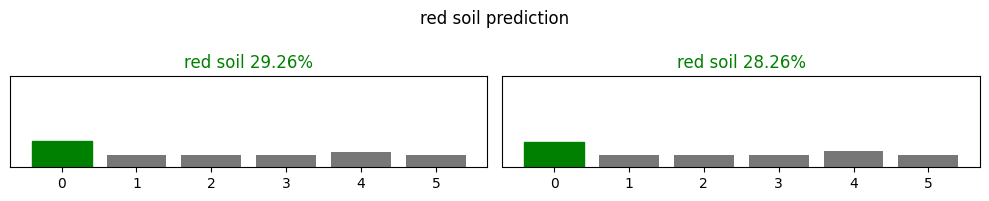

✅PREDICTION EVALUATION 6
[0.2177806  0.14248079 0.13761294 0.13896383 0.22546977 0.13769208]
[0.25217798 0.13670915 0.13665272 0.13675588 0.20104438 0.13665979]


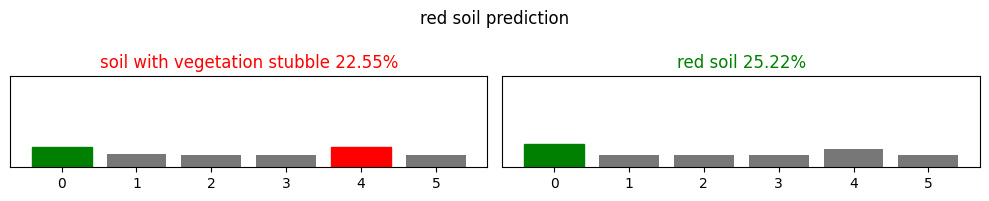

✅PREDICTION EVALUATION 7
[0.23877601 0.14123626 0.13761485 0.1409365  0.20343663 0.13799973]
[0.28368688 0.13606288 0.13537583 0.1374164  0.17194979 0.13550827]


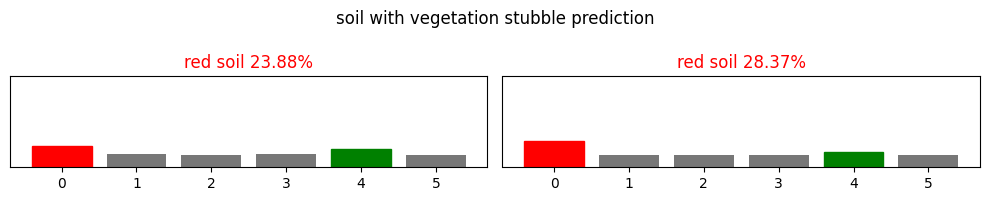

✅PREDICTION EVALUATION 8
[0.19007334 0.15252127 0.13843419 0.14406349 0.23544894 0.13945879]
[0.3028207  0.13445012 0.1340434  0.13504246 0.15956894 0.13407439]


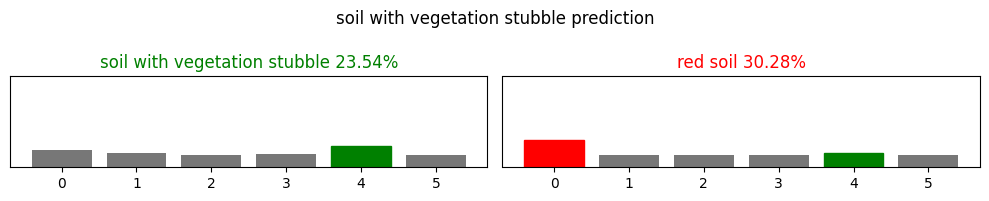

✅PREDICTION EVALUATION 9
[0.18557501 0.15084398 0.13747606 0.13847376 0.2500718  0.13755937]
[0.25986516 0.13754727 0.136501   0.13723344 0.19233994 0.13651313]


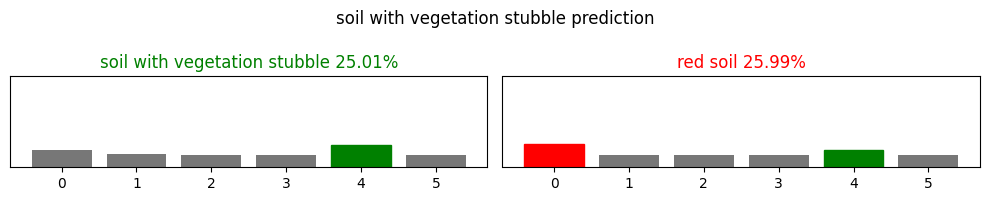

In [81]:
def plot_comparison(idx, predicted_one, predicted_lbls_one, predicted_two, predicted_lbls_two):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))
  fig.suptitle(f'{class_names[demo_labels[idx]]} prediction')

  if predicted_lbls_one[idx] == demo_labels[idx]:
    color = 'green'
  else:
    color = 'red'

  ax1.set_title(f'{class_names[predicted_lbls_one[idx]]} {(100.0*np.max(predicted_one[idx])):.2f}%', color=color)

  ax1.set_xticks(range(len(class_names)))
  ax1.set_yticks([])

  prediction_plt = ax1.bar(range(len(class_names)), predicted_one[idx], color="#777777")
  ax1.set_ylim([0, 1])

  prediction_plt[predicted_lbls_one[idx]].set_color('red')
  prediction_plt[demo_labels[idx]].set_color('green')

  if predicted_lbls_two[idx] == demo_labels[idx]:
    color = 'green'
  else:
    color = 'red'

  ax2.set_title(f'{class_names[predicted_lbls_two[idx]]} {(100.0*np.max(predicted_two[idx])):.2f}%', color=color)

  ax2.set_xticks(range(len(class_names)))
  ax2.set_yticks([])

  prediction_plt = ax2.bar(range(len(class_names)), predicted_two[idx], color="#777777")
  ax2.set_ylim([0, 1])

  prediction_plt[predicted_lbls_two[idx]].set_color('red')
  prediction_plt[demo_labels[idx]].set_color('green')

  plt.tight_layout()
  plt.show()

demo_simple_predictions, demo_simple_predicted_labels = make_predictions(probability_model, demo_images)
demo_enh_predictions, demo_enh_predicted_labels = make_predictions(enh_probability_model, demo_images)

# >>> Live demo
for i in range(len(demo_images)):
  print(f'✅PREDICTION EVALUATION {i}', demo_simple_predictions[i], demo_enh_predictions[i], sep="\n")
  plot_comparison(i, demo_simple_predictions, demo_simple_predicted_labels, demo_enh_predictions, demo_enh_predicted_labels)

> Fin live demo: 23 de abril del 2025